# IGP 5 Models - Feature removal - Both Dataset

In [1]:
# load functions in python file with magic command
%run ../code/model.py

import pandas as pd
output_csv_path = '../output/'

#### Interpretation for next round (reduced feature models)

* `Gradient Boosting`
  * [ 1,  2,  3,  5, 10] - activeNight, inactiveLight, activeDark, std, kurtosis
  * [ 3,  2,  1,  5, 10] - activeDark, inactiveLight, activeNight, std, kurtosis
* `XGBoost` 
  * inactiveLight, activeDark, activeNight, kurtosis, percentZero
  *  [1, 2, 3, 5, 7] - activeNight, inactiveLight, activeDark, std, q1
  *  [2, 7, 3, 1, 5] - inactiveLight, q1, activeDark, activeNight, std
* `LightGBM`
  * [ 1,  2,  3,  5, 10] - activeNight, inactiveLight, activeDark, std, kurtosis
  * [ 3,  2, 10,  1,  0] - activeDark, inactiveLight, kurtosis, activeNight, inactiveDay
* `Random Forest` 
  * [2, 3, 4, 6, 9] - inactiveLight, activeDark, mean, median, percent_zero
  * [3, 2, 0, 6, 9] - activeDark, inactiveLight, inactiveDay, median, percent_zero
* `AdaBoost`
  * [0, 1, 2, 3, 5] - inactiveDay, activeNight, inactiveLight, activeDark, std
  * [3, 2, 5, 1, 0] - activeDark, inactiveLight, std, activeNight, inactiveDay

In [3]:
# read from csv
both_X_train = pd.read_csv(output_csv_path + 'both_X_train.csv')
both_y_train = pd.read_csv(output_csv_path + 'both_y_train.csv').iloc[:, 0]

In [4]:
# print column namees and idx
for i, col_name in enumerate(both_X_train.columns):
    print(f"Col: {col_name}, Colnum: {i}")


Col: inactiveDay, Colnum: 0
Col: activeNight, Colnum: 1
Col: inactiveLight, Colnum: 2
Col: activeDark, Colnum: 3
Col: mean, Colnum: 4
Col: std, Colnum: 5
Col: median, Colnum: 6
Col: q1, Colnum: 7
Col: q3, Colnum: 8
Col: percent_zero, Colnum: 9
Col: kurtosis, Colnum: 10


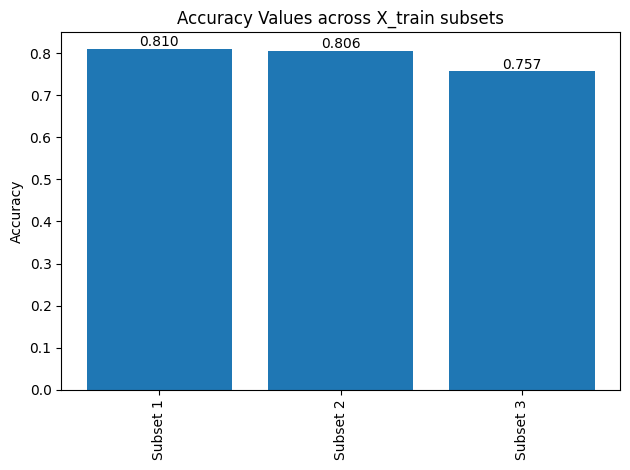

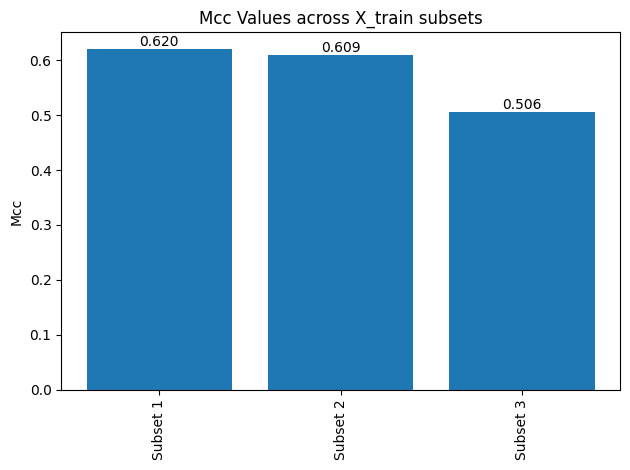

In [7]:
#[ 1,  2,  3,  5, 10] - activeNight, inactiveLight, activeDark, std, kurtosis
#[ 3,  2,  1,  5, 10] - activeDark, inactiveLight, activeNight, std, kurtosis
gb_col1 = [2,3,5]
gb_col2 = [2,3,10]
gb_col3 = [1, 2, 5]

gb1 = keep_columns(both_X_train, gb_col1)
gb2 = keep_columns(both_X_train, gb_col2)
gb3 = keep_columns(both_X_train,gb_col3)

gb = [('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE))]

gb1_both = evaluate_models(gb, gb1, both_y_train)
gb2_both = evaluate_models(gb, gb2, both_y_train)
gb3_both = evaluate_models(gb, gb3, both_y_train)


gb_dict = [gb1_both, gb2_both, gb3_both]

plot_metric_dicts(gb_dict, "accuracy")
plot_metric_dicts(gb_dict, "mcc")

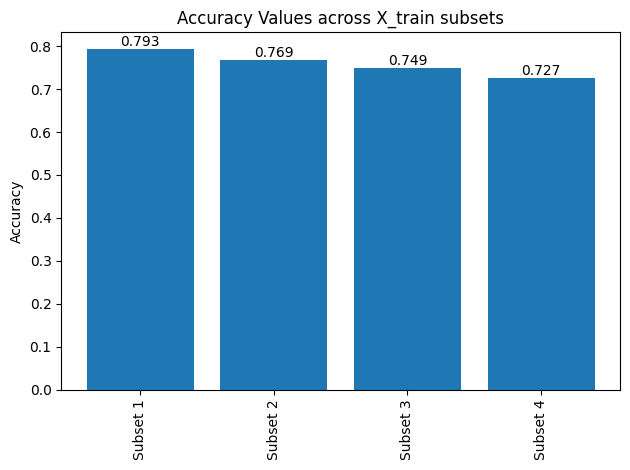

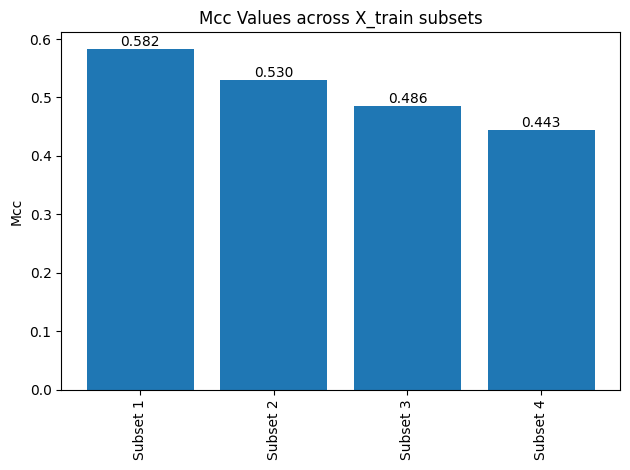

In [8]:
# xgboost 
# [1, 2, 3, 5, 7] - activeNight, inactiveLight, activeDark, std, q1
# [2, 7, 3, 1, 5] - inactiveLight, q1, activeDark, activeNight, std
xgb_col1 = [2,3,5]
xgb_col2 = [2,3,7]
xgb_col3 = [7,3,5]
xgb_col4 = [1,2,5]

xgb1 = keep_columns(both_X_train, xgb_col1)
xgb2 = keep_columns(both_X_train, xgb_col2)
xgb3 = keep_columns(both_X_train, xgb_col3)
xgb4 = keep_columns(both_X_train, xgb_col4)

xgb = [('XGBoost', XGBClassifier(random_state=RANDOM_STATE))]

xgb1_both = evaluate_models(xgb, xgb1, both_y_train)
xgb2_both = evaluate_models(xgb, xgb2, both_y_train)
xgb3_both = evaluate_models(xgb, xgb3, both_y_train)
xgb4_both = evaluate_models(xgb, xgb4, both_y_train)

xgb_dict = [xgb1_both, xgb2_both, xgb3_both, xgb4_both]
plot_metric_dicts(xgb_dict, "accuracy")
plot_metric_dicts(xgb_dict, "mcc")

## Results

* **LGBM** is going to the final model for hyperparameter tuning.
* Slight drop in accuracy from best out-of-box model with all features (QDA, acc = 0.893, MCC=0.801)
* Features: (`inactiveLight`, `activeDark`, `percent_zero`)

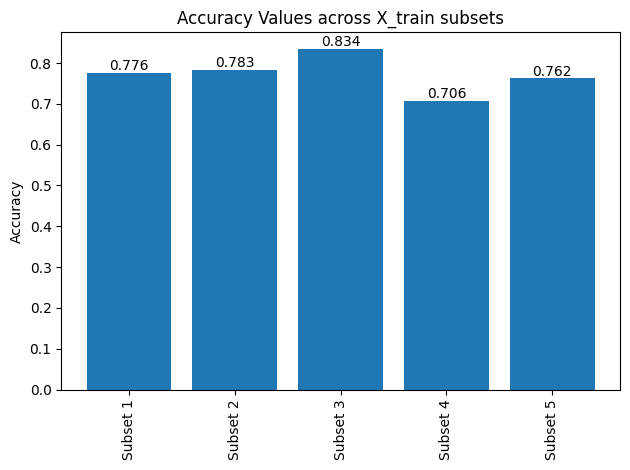

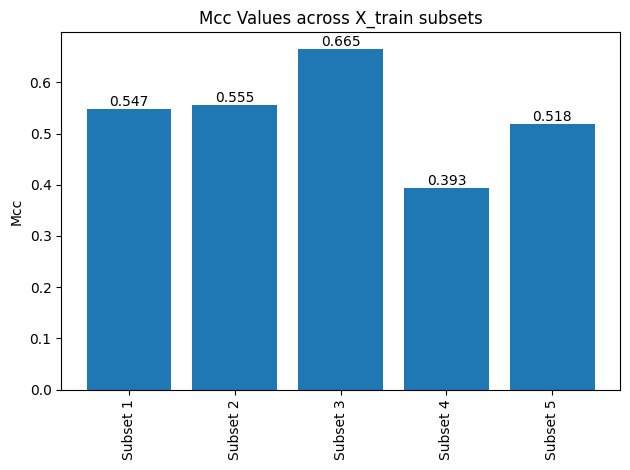

In [18]:
# lgbm
#[ 1,  2,  3,  5, 10] - activeNight, inactiveLight, activeDark, std, kurtosis
#[ 3,  2, 10,  1,  0] - activeDark, inactiveLight, kurtosis, activeNight, inactiveDay

lgbm_col1 = [2,3,5]
lgbm_col2 = [2,3, 10]
lgbm_col3 = [1,2,3]
lgbm_col4 = [0,1,10]
lgbm_col5 = [2,3]

lgbm1 = keep_columns(both_X_train, lgbm_col1)
lgbm2 = keep_columns(both_X_train, lgbm_col2)
lgbm3 = keep_columns(both_X_train, lgbm_col3)
lgbm4 = keep_columns(both_X_train, lgbm_col4)
lgbm5 = keep_columns(both_X_train, lgbm_col5)

lgbm = [('LightGBM', LGBMClassifier(verbose=-1, random_state=RANDOM_STATE))]

lgbm1_both = evaluate_models(lgbm, lgbm1, both_y_train)
lgbm2_both = evaluate_models(lgbm, lgbm2, both_y_train)
lgbm3_both = evaluate_models(lgbm, lgbm3, both_y_train)
lgbm4_both = evaluate_models(lgbm, lgbm4, both_y_train)
lgbm5_both = evaluate_models(lgbm, lgbm5, both_y_train)

lgbm_dict = [lgbm1_both, lgbm2_both, lgbm3_both, lgbm4_both, lgbm5_both]
plot_metric_dicts(lgbm_dict, "accuracy")
plot_metric_dicts(lgbm_dict, "mcc")

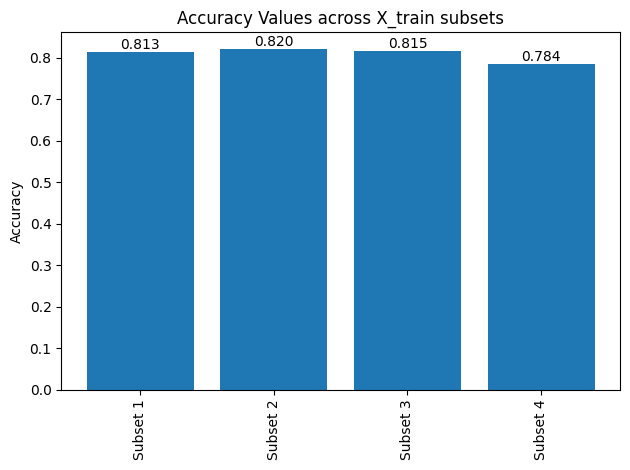

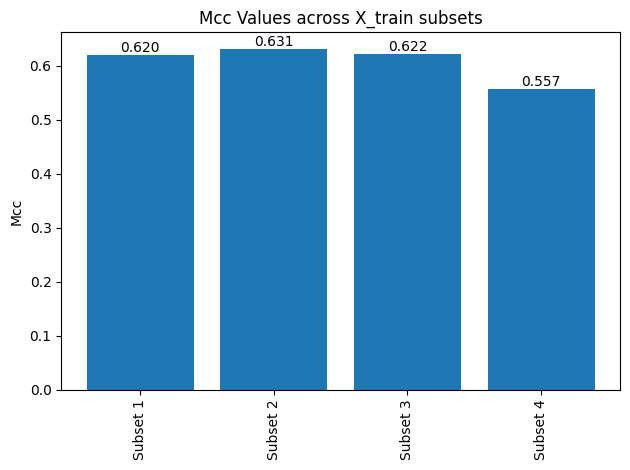

In [10]:
# random forest
#[2, 3, 4, 6, 9] - inactiveLight, activeDark, mean, median, percent_zero
 # [3, 2, 0, 6, 9] - activeDark, inactiveLight, inactiveDay, median, percent_zero


rf_col1 = [2,3,4]
rf_col2 = [2,3,6]
rf_col3 = [2,3,9]
rf_col4 = [3,6,0]

rf1 = keep_columns(both_X_train, rf_col1)
rf2 = keep_columns(both_X_train, rf_col2)
rf3 = keep_columns(both_X_train, rf_col3)
rf4 = keep_columns(both_X_train, rf_col4)

rf = [('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE))]

rf1_both = evaluate_models(rf, rf1, both_y_train)
rf2_both = evaluate_models(rf, rf2, both_y_train)
rf3_both = evaluate_models(rf, rf3, both_y_train)
rf4_both = evaluate_models(rf, rf4, both_y_train)

rf_dict = [rf1_both, rf2_both, rf3_both, rf4_both]
plot_metric_dicts(rf_dict, "accuracy")
plot_metric_dicts(rf_dict, "mcc")

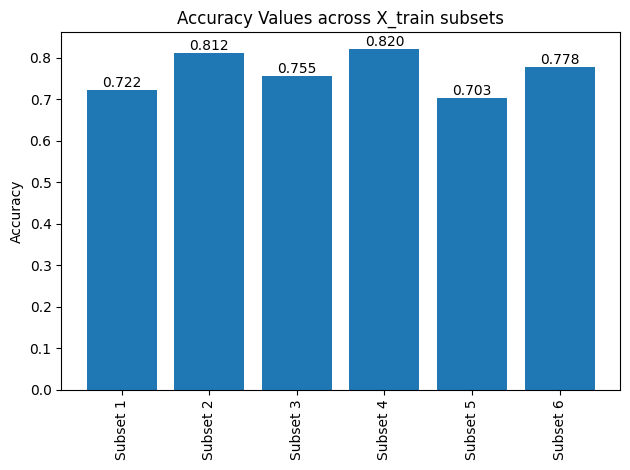

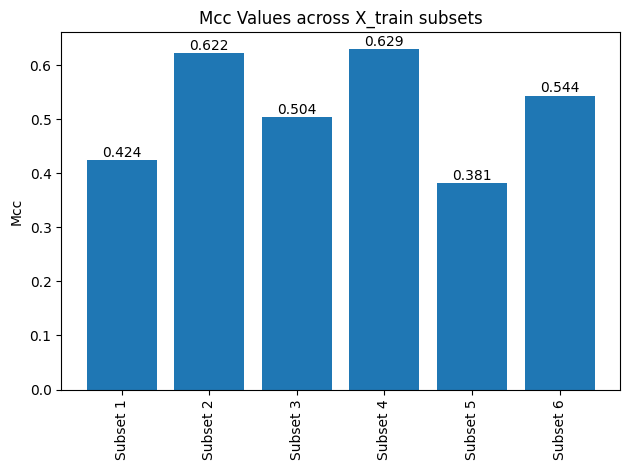

In [15]:
 # AdaBoost
#[0, 1, 2, 3, 5] - inactiveDay, activeNight, inactiveLight, activeDark, std
#[3, 2, 5, 1, 0] - activeDark, inactiveLight, std, activeNight, inactiveDay

ada_col1 = [0,1,5]
ada_col2 = [2,3,5]
ada_col3 = [0,2,5]
ada_col4 = [1,3,5]
ada_col5 = [1,5]
ada_col6 = [3,5]

ada1 = keep_columns(both_X_train, ada_col1)
ada2 = keep_columns(both_X_train, ada_col2)
ada3 = keep_columns(both_X_train, ada_col3)
ada4 = keep_columns(both_X_train, ada_col4)
ada5 = keep_columns(both_X_train, ada_col5)
ada6 = keep_columns(both_X_train, ada_col6)

ada = [('AdaBoost', AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE))]

ada1_both = evaluate_models(ada, ada1, both_y_train)
ada2_both = evaluate_models(ada, ada2, both_y_train)
ada3_both = evaluate_models(ada, ada3, both_y_train)
ada4_both = evaluate_models(ada, ada4, both_y_train)
ada5_both = evaluate_models(ada, ada5, both_y_train)
ada6_both = evaluate_models(ada, ada6, both_y_train)

ada_dict = [ada1_both, ada2_both, ada3_both, ada4_both, ada5_both, ada6_both]
plot_metric_dicts(ada_dict, "accuracy")
plot_metric_dicts(ada_dict, "mcc")


## Comparison

**Gradient Boosting**
* Subset 1 (`inactiveLight`, `activeDark`, `std`)
  * Accuracy = 0.810
  * MCC = 0.620

**XGBoost**
* Subset 1 (`inactiveLight`, `activeDark`, `std`)
  * Accuracy = 0.793
  * MCC = 0.582

**LGBM**
* Subset 3 (`activeNight`, `inactiveLight`, `activeDark`)
  * Accuracy = 0.834
  * MCC = 0.665

**Random Forest**
* Subset 2 (`inactiveLight`, `activeDark`, `median`) 
  * Accuracy = 0.820
  * MCC = 0.631

**AdaBoost**
* Subset 4 (`activeNight`, `activeDark`, `std`)
  * Accuracy = 0.82
  * MCC = 0.629



## Results

* **Random Forest** is going to the final model for hyperparameter tuning. 
  * Accuracy = 0.820
  * MCC = 0.631
* Slight drop in accuracy from best out-of-box model with all features (LightGBM, acc = 0.879, MCC=0.753)
* Features: (`inactiveLight`, `activeDark`, `median`)

Also taking with multicollinearity - to do Ridge regression, etc.

**LGBM**
* Subset 3 (`activeNight`, `inactiveLight`, `activeDark`)
  * Accuracy = 0.834
  * MCC = 0.665

## Discussion

* There is something going on with the four first features in terms of multicollinearity.
  * unstable coefficients
  * reduced interpretability
  * redundancy
  * complementary information to the model - reinforcing
* But including both seems to produce better results
  * could be an interaction or that something is captured
  * or that they are distributed differently, thus affecting the data differently

**Options**

* removing features (what I am currently doing)
* creating a different or new features which combines these or are calculated differently
* regularisation - e.g. `Ridge or Lasso Regression` to mitigate against collinearity
* ensemble methods - different models, different features...but looking to keep this performant but simple and interpretable.

**new feature**
* linear combination - $a * inactiveLight + b * activeDark + c * inactiveDay + d * activeNight
  * coefficients - equal weights, correlation, regularised regression to estimate optimal weights
* non-linear combination - using polynomial funciton t create new feature
* clustering - using assignments to create categorical feature
* PCA - dimension reduction
* feature interaction - e.g. combining by multiplying.